In [1]:
from google.colab import files
uploaded = files.upload()

Saving cipdataset.csv to cipdataset.csv


In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [3]:
data = pd.read_csv("cipdataset.csv")

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,created_at,tweet_id,receiver_name,receiver_id,tweet_text,screen_name,name,account_creation_date,urls,preprocess_tweet,Positive,Negative,Compound,Sentiment,label
0,0,0,2022-04-25 17:10:41+00:00,1518638641848803329,NaN,NaN,rt @wckitchen: scenes from our food kit delive...,joelleshay1,@Joellimoguy,Fri Mar 31 05:40:07 +0000 2017,[],scenes food kit delivery umlazi south africa w...,0.318,0.000,0.6808,Positive,1
1,1,1,2022-04-25 17:10:38+00:00,1518638627923894274,NaN,NaN,"public health experts, juno thomas and linda e...",SABCNews,SABC News,Wed Mar 18 15:16:33 +0000 2009,"[{'url': 'https://t.co/EE5xDNmv7q', 'expanded_...",public health expes juno thomas linda erasmus ...,0.000,0.000,0.0000,Negative,0
2,2,2,2022-04-25 17:10:37+00:00,1518638624849412096,NaN,NaN,rt @_bonga: kzn revised the cost of the floods...,_RebaS,Reba,Sun Nov 23 15:31:45 +0000 2014,[],kzn revised cost floods r bn r bn,0.000,0.000,0.0000,Negative,0
3,3,3,2022-04-25 17:10:24+00:00,1518638571049078784,NaN,NaN,mdmema: even if you don’t live next to a water...,BlueCrabsFoodFe,Blue Crabs Beer Food & Wine Fest,Fri Feb 16 20:37:12 +0000 2018,"[{'url': 'https://t.co/qZkYMJ183I', 'expanded_...",mdmema even live next water source small amoun...,0.000,0.134,-0.1779,Negative,0
4,4,4,2022-04-25 17:10:09+00:00,1518638508201881600,NaN,NaN,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,albertw73935497,Albert J. Wallace,Mon May 11 12:41:54 +0000 2020,[],right subways completely sealed water flow h,0.000,0.000,0.0000,Negative,0


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 48.1 MB/s 
     |████████████████████████████████| 6.6 MB 53.7 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 432x288 with 0 Axes>

In [7]:
data['label'].value_counts()

0    390
1    111
Name: label, dtype: int64

In [8]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(data['preprocess_tweet']).reshape(-1, 1), np.array(data['label']).reshape(-1, 1));
new_data = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'Sentiment']);

In [9]:
from google.colab import files
uploaded = files.upload()
new_data = pd.read_csv("error.csv")
new_data['Sentiment'].value_counts()

Saving error.csv to error.csv


1    390
0    390
Name: Sentiment, dtype: int64

In [10]:
new_data.head()

,Unnamed: 0,text_clean,Sentiment
0,0,scenes food kit delivery umlazi south africa w...,1
1,1,public health expes juno thomas linda erasmus ...,0
2,2,kzn revised cost floods r bn r bn,0
3,3,mdmema even live next water source small amoun...,0
4,4,right subways completely sealed water flow h,0


In [ ]:
from google.colab import files

new_data.to_csv('error.csv') 
files.download('error.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
X = new_data['text_clean'].values
y = new_data['Sentiment'].values

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

In [15]:
X_test = data['preprocess_tweet'].values
y_test = data['label'].values

In [16]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [17]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [18]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 546
VALIDATION DATA: 234
TESTING DATA: 501


In [19]:
MAX_LEN=128

In [20]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [21]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            str(data[i]),
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [22]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [23]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [24]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(2, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [25]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [26]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
18/18 [==============================] - 806s 44s/step - loss: 0.6649 - categorical_accuracy: 0.6154 - val_loss: 0.5647 - val_categorical_accuracy: 0.7564
Epoch 2/4
18/18 [==============================] - 786s 44s/step - loss: 0.4820 - categorical_accuracy: 0.8370 - val_loss: 0.3780 - val_categorical_accuracy: 0.8675
Epoch 3/4
18/18 [==============================] - 808s 45s/step - loss: 0.3025 - categorical_accuracy: 0.8938 - val_loss: 0.2412 - val_categorical_accuracy: 0.9060
Epoch 4/4
18/18 [==============================] - 816s 45s/step - loss: 0.1590 - categorical_accuracy: 0.9505 - val_loss: 0.1905 - val_categorical_accuracy: 0.9402


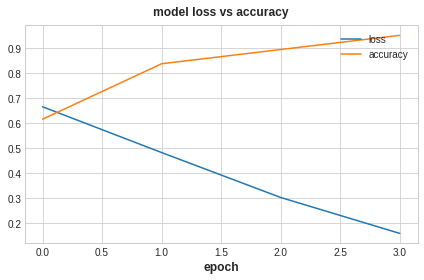

In [34]:
from matplotlib import pyplot
pyplot.plot(history_bert.history['loss'])
pyplot.plot(history_bert.history['categorical_accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()